<a href="https://colab.research.google.com/github/ngoan22mse23088/ImageVideoProcessing/blob/master/IVP501_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FPT School of Business (FSB) - FPT University
FSB-MSE12-HCM : Image Video Processing (IVP501) <br>
Instructor : Dr. Nguyen Ngoc Truong Minh <br>
22MSE23088 : Le Chi Ngoan <br>
22MSE23082 : Nguyen Thi Kieu Tien <br>
22MSE23084 : Nguyen Pham Khanh Ngoc <br>


# Home Work 1

**Problem 3_1 Quantization**

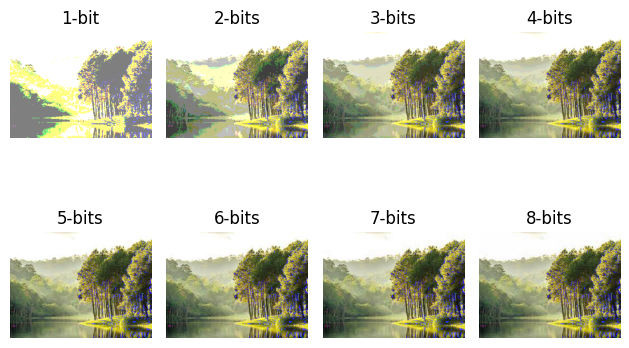

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# Image URL on GitHub
image_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/blob/master/Images/nature.jpg?raw=true'

# Download the image
image_data = urlopen(image_url)

# Convert the downloaded data to a PIL Image object
pil_image = Image.open(image_data)

# Convert PIL Image to NumPy array
img = np.array(pil_image)

# Repeat with different number of bits
for no_of_bit in range(1, 9):
    # Quantize to a given number of bits
    no_of_level = 2 ** no_of_bit
    level_gap = 256 / no_of_level

    # Quantization
    quantized_img = np.uint8(np.ceil(img / level_gap) * level_gap - 1)

    # Plot image
    plt.subplot(2, 4, no_of_bit)
    plt.imshow(quantized_img)
    plt.axis('off')

    # Image caption and saving
    if no_of_bit == 1:
        name = str(no_of_bit) + '-bit'
    else:
        name = str(no_of_bit) + '-bits'

    plt.title(name)

plt.tight_layout()
plt.show()


**Problem 3_2 Brightness Adjustment**

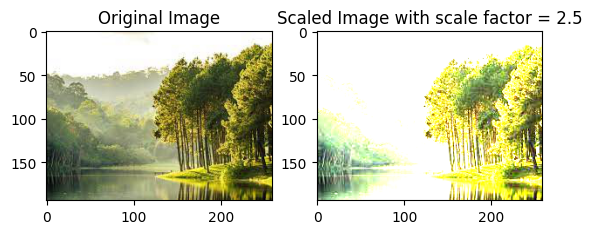

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# Image URL on GitHub
image_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Images/nature.jpg'

# Download the image
image_data = urlopen(image_url)

# Convert the downloaded data to a PIL Image object
pil_image = Image.open(image_data)

# Convert PIL Image to NumPy array
img = np.array(pil_image).astype(float) / 255.0

# Brightness adjustment by intensity scaling
scale = 2.5  # Lighter
scaled_img = scale * img

# Plot images
plt.subplot(1, 2, 1)
plt.imshow(img, vmin=0, vmax=1)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(scaled_img, vmin=0, vmax=1)
plt.title('Scaled Image with scale factor = 2.5')

# Save the scaled image
plt.savefig('Brightness_Lighter.jpg')
plt.show()

**Problem 3_3 Add two images**

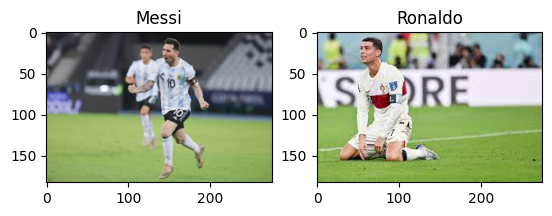

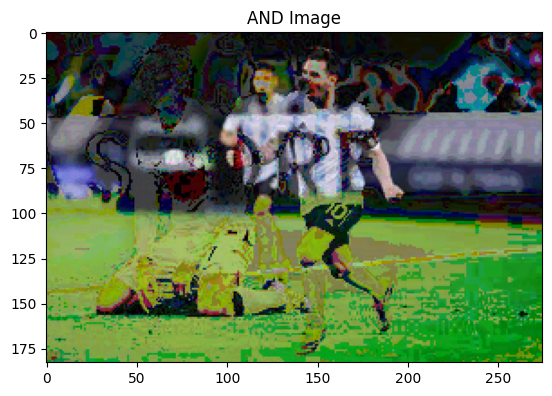

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# URLs of the images on GitHub
image1_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Images/messi.jpg'
image2_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Images/ronaldo.jpg'

# Download the images
image1_data = urlopen(image1_url)
image2_data = urlopen(image2_url)

# Convert the downloaded data to PIL Image objects
image1 = Image.open(image1_data)
image2 = Image.open(image2_data)

# Resize image1 to match the desired size
desired_size = (275, 183)
image1 = image1.resize(desired_size)

# Convert PIL Images to NumPy arrays
I1 = np.array(image1)
I2 = np.array(image2)

# Perform bitwise AND operation
I_and = np.bitwise_and(I1, I2)

# Plot images
plt.subplot(1, 2, 1)
plt.imshow(I1)
plt.title('Messi')

plt.subplot(1, 2, 2)
plt.imshow(I2)
plt.title('Ronaldo')

plt.figure()
plt.imshow(I_and, cmap='gray', vmin=0, vmax=255)
plt.title('AND Image')

# Save the AND image
plt.savefig('AND_image.jpg')
plt.show()

**Problem 3_4 Contrast Enhancement**

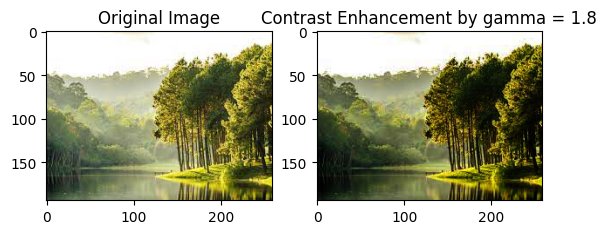

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen

# Image URL on GitHub
image_url = 'https://github.com/ngoan22mse23088/ImageVideoProcessing/raw/master/Images/nature.jpg'

# Download the image
image_data = urlopen(image_url)

# Convert the downloaded data to a PIL Image object
pil_image = Image.open(image_data)

# Convert PIL Image to NumPy array
img = np.array(pil_image).astype(float) / 255.0

# Contrast enhancement by changing 'gamma' characteristics
# gamma = 1.0  # Unchanged
# gamma = 0.3  # Decrease contrast
gamma = 1.8  # Increase contrast
gamma_img = img ** gamma

# Plot images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gamma_img)
plt.title('Contrast Enhancement by gamma = 1.8')

# Save the contrast-enhanced image
plt.savefig('Contrast_Increase.png')
plt.show()

**Problem 3_5 Geometrics Operations**

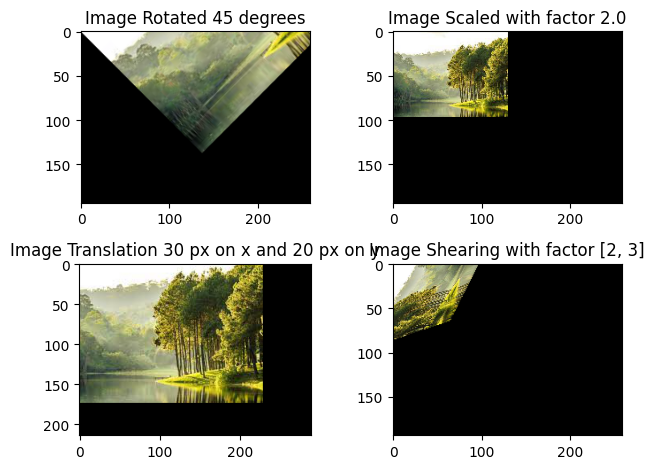

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import warp, AffineTransform

# Load image from Git repository
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/nature.jpg')

# Rotation an angle = 45 degrees
rotation_matrix = np.array([[np.cos(np.deg2rad(45)), -np.sin(np.deg2rad(45)), 0],
                            [np.sin(np.deg2rad(45)), np.cos(np.deg2rad(45)), 0],
                            [0, 0, 1]])
Imga = warp(Img, AffineTransform(matrix=rotation_matrix))
plt.subplot(2, 2, 1)
plt.imshow(Imga)
plt.title('Image Rotated 45 degrees')

# Scaling with a factor = 2.0
scaling_matrix = np.array([[2.0, 0, 0],
                           [0, 2.0, 0],
                           [0, 0, 1]])
Imgb = warp(Img, AffineTransform(matrix=scaling_matrix))
plt.subplot(2, 2, 2)
plt.imshow(Imgb)
plt.title('Image Scaled with factor 2.0')

# Translation 30 pixels on x and 20 pixels on y
translation_matrix = np.array([[1, 0, 30],
                               [0, 1, 20],
                               [0, 0, 1]])
Imgc = warp(Img, AffineTransform(matrix=translation_matrix),
            output_shape=(Img.shape[0]+20, Img.shape[1]+30))
plt.subplot(2, 2, 3)
plt.imshow(Imgc)
plt.title('Image Translation 30 px on x and 20 px on y')

# Shearing
shearing_matrix = np.array([[1, 3, 0],
                            [2, 1, 0],
                            [0, 0, 1]])
Imgd = warp(Img, AffineTransform(matrix=shearing_matrix))
plt.subplot(2, 2, 4)
plt.imshow(Imgd)
plt.title('Image Shearing with factor [2, 3]')

plt.tight_layout()
plt.show()

**Problem 4_1 Contrast Enhancement**

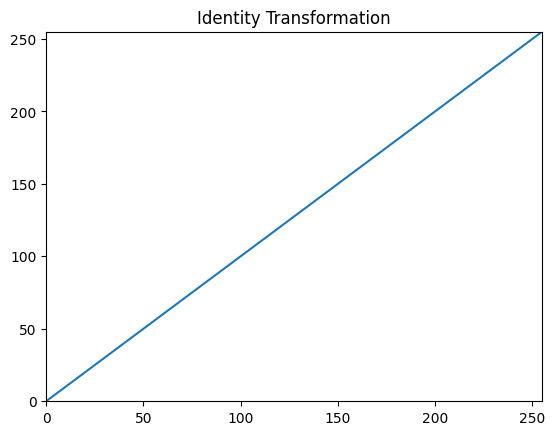

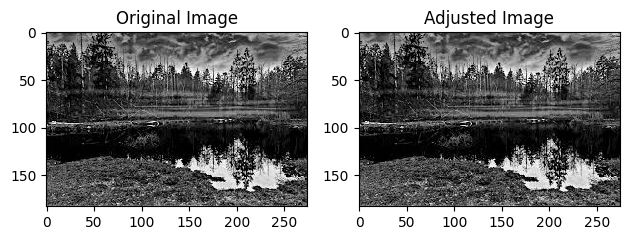

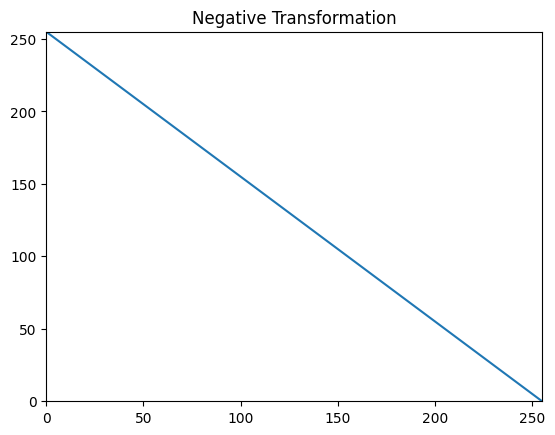

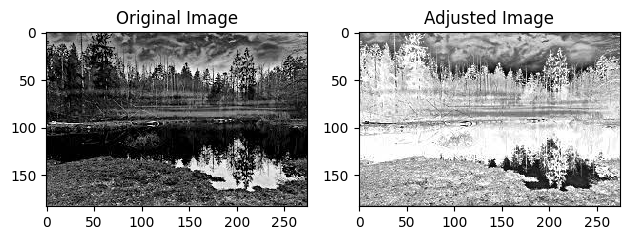

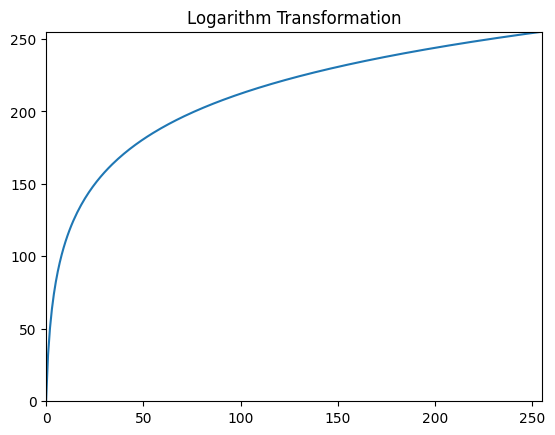

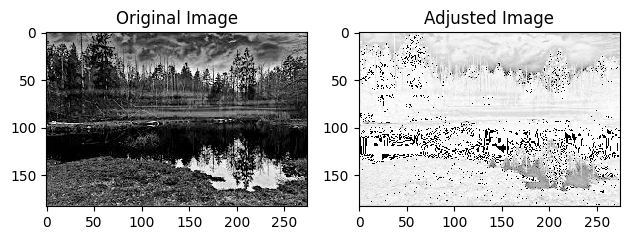

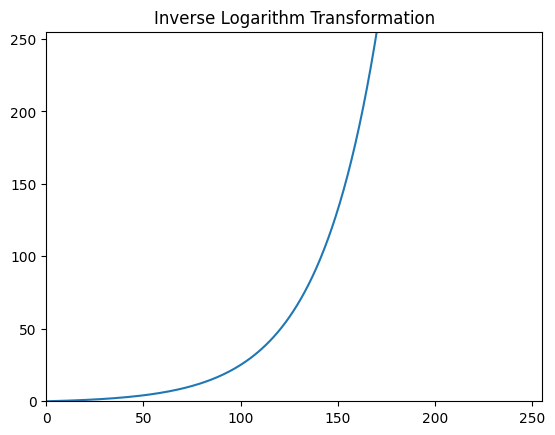

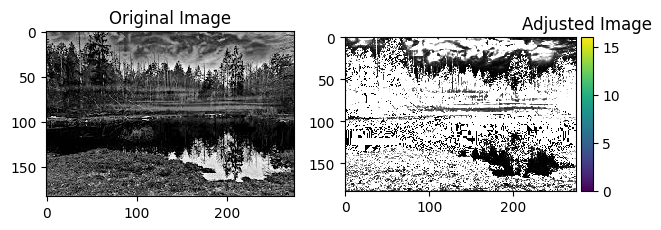

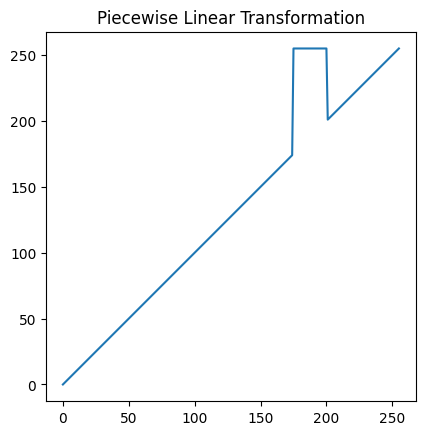

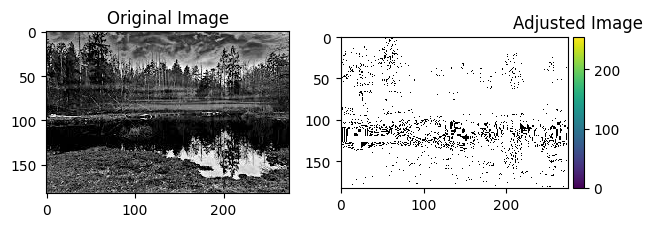

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.util import img_as_ubyte

# Load image from Git repository
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/swamp.jpg')

# Normalize image to range [0, 1]
Img = img_as_ubyte(Img)

#a. Contrast with identity transformation
x = np.arange(256, dtype=np.uint8)
plt.plot(x)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.title('Identity Transformation')
plt.show()

# Apply identity transformation to the image
Img_idt = x[Img]
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_idt)
plt.title('Adjusted Image')
plt.show()

#b. Contrast with negative transformation
x_neg = 255 - x
plt.plot(x_neg)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.title('Negative Transformation')
plt.show()

# Apply negative transformation to the image
Img_cpm = 255 - Img
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_cpm)
plt.title('Adjusted Image')
plt.show()

#c. Contrast with logarithm transformation
x = np.arange(256)
c = 255 / np.log(256)
y = c * np.log(x + 1)

plt.plot(y)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.title('Logarithm Transformation')
plt.show()

# Apply logarithm transformation to the image
Img_log = y[img_as_ubyte(Img * 255 / np.max(Img))] / 255
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_log)
plt.title('Adjusted Image')
plt.show()

#d. Contrast with inverse logarithm transformation
x = np.arange(256)
c = 255 / np.log(4096)
y = np.exp(x / c) - 1

plt.plot(y)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.title('Inverse Logarithm Transformation')
plt.show()

# Apply inverse logarithm transformation to the image
Img_invlog = y[img_as_ubyte(Img * 255 / np.max(Img))] / 255
plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_invlog)
plt.title('Adjusted Image')
plt.show()

#e. Contrast with piecewise linear transformation
y = np.zeros(256)
y[:175] = np.arange(175)
y[175:201] = 255
y[201:256] = np.arange(201, 256)

# Apply piecewise linear transformation to the image
Img_pcslin = y[Img.astype(int)]
plt.plot(y)
plt.axis('tight')
plt.axis('square')
plt.title('Piecewise Linear Transformation')
plt.show()

plt.figure()
plt.subplot(1, 2, 1)
imshow(Img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
imshow(Img_pcslin)
plt.title('Adjusted Image')
plt.show()

**Problem 5_1 Image Subtraction**

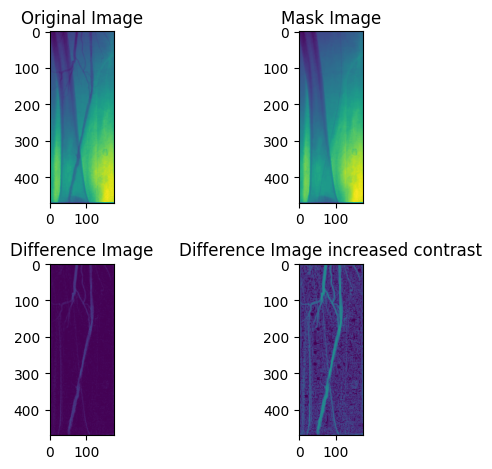

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from PIL import Image
import urllib.request

# URLs of the images in the GitHub repository
liveImg_url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/live.jpg'
maskImg_url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/mask.jpg'

# Download the images using urllib
urllib.request.urlretrieve(liveImg_url, 'live.jpg')
urllib.request.urlretrieve(maskImg_url, 'mask.jpg')

# Load images
liveImg = imread('live.jpg').astype(np.float64)
maskImg = imread('mask.jpg').astype(np.float64)

# Calculate the difference between two images
diffImg = np.abs(maskImg - liveImg)
gamma = 0.4
diffImg_constrated = diffImg ** gamma

# Show images
plt.subplot(2, 2, 1)
plt.imshow(liveImg)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(maskImg)
plt.title('Mask Image')

plt.subplot(2, 2, 3)
plt.imshow(diffImg)
plt.title('Difference Image')

plt.subplot(2, 2, 4)
plt.imshow(diffImg_constrated)
plt.title('Difference Image increased contrast')

plt.tight_layout()
plt.show()

# Save images
imsave('Image_Subtraction.jpg', diffImg)
imsave('Image_Subtraction_w_con.jpg', diffImg_constrated)

**Problem 5_2 Image Comparison**

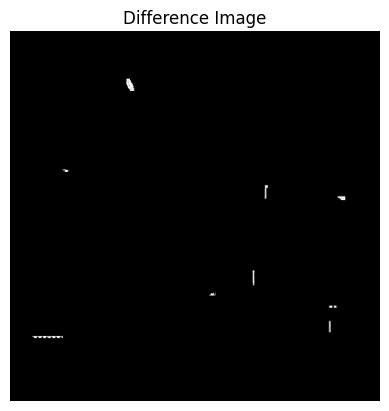

<ipython-input-10-1230f5837d3b>:26: UserWarning: Mask_Comparison.png is a low contrast image
  imsave('Mask_Comparison.png', diffImg)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
import urllib.request

# URLs of the images in the GitHub repository
maskImg1_url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/mask1.png'
maskImg2_url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/mask2.png'

# Download the images using urllib
urllib.request.urlretrieve(maskImg1_url, 'mask1.png')
urllib.request.urlretrieve(maskImg2_url, 'mask2.png')

# Load images
maskImg1 = imread('mask1.png').astype(np.float64)
maskImg2 = imread('mask2.png').astype(np.float64)

# Perform image subtraction and comparison
diffImg = np.abs(maskImg2 - maskImg1)
plt.imshow(diffImg, cmap='gray')
plt.title('Difference Image')
plt.axis('off')
plt.show()

# Save the difference image
imsave('Mask_Comparison.png', diffImg)

**Problem 5_3 Image Averaging**

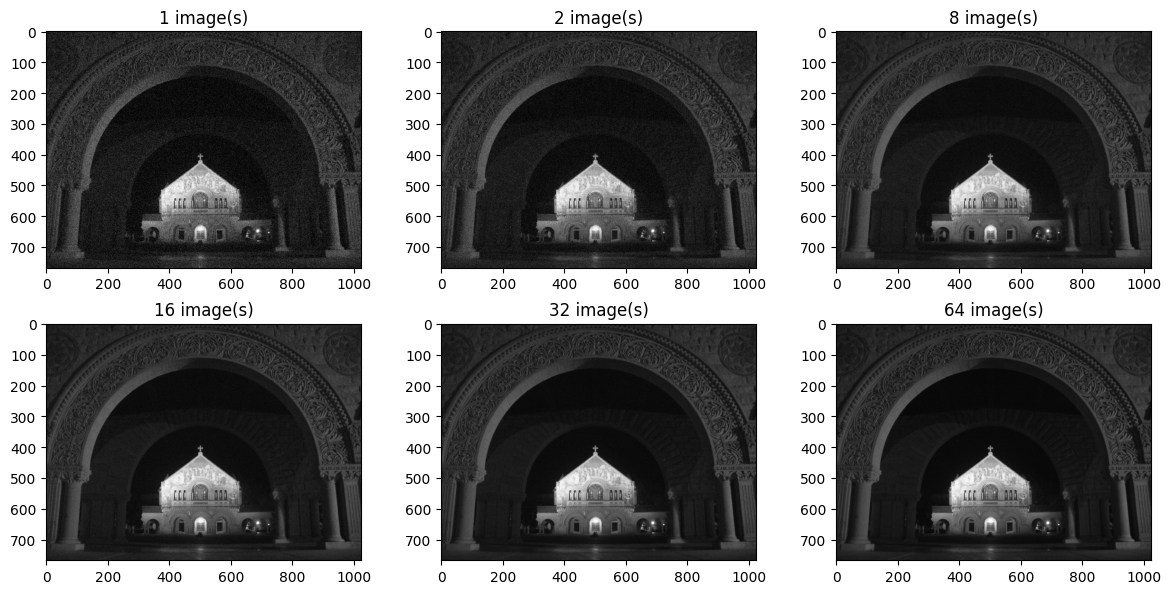

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
from skimage.util import random_noise

# Load image
Img = img_as_ubyte(rgb2gray(imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/quadnight.jfif')))

# Repeat over different number of samples
nArray = [1, 2, 8, 16, 32, 64]
fig, axs = plt.subplots(2, len(nArray) // 2, figsize=(12, 6))
axs = axs.flatten()

for i, N in enumerate(nArray):
    avgImg = np.zeros_like(Img, dtype=np.float64)  # Initialize an empty image

    # Add Gaussian noise to each image, accumulate this image to avg image
    for _ in range(N):
        noisyImg = random_noise(Img, mode='gaussian', var=0.01)
        avgImg += noisyImg

    # Show image case i
    avgImg /= N
    axs[i].imshow(avgImg, cmap='gray')
    axs[i].set_title(f'{N} image(s)')

plt.tight_layout()
plt.show()

**Problem 5_4 Histogram Generation**

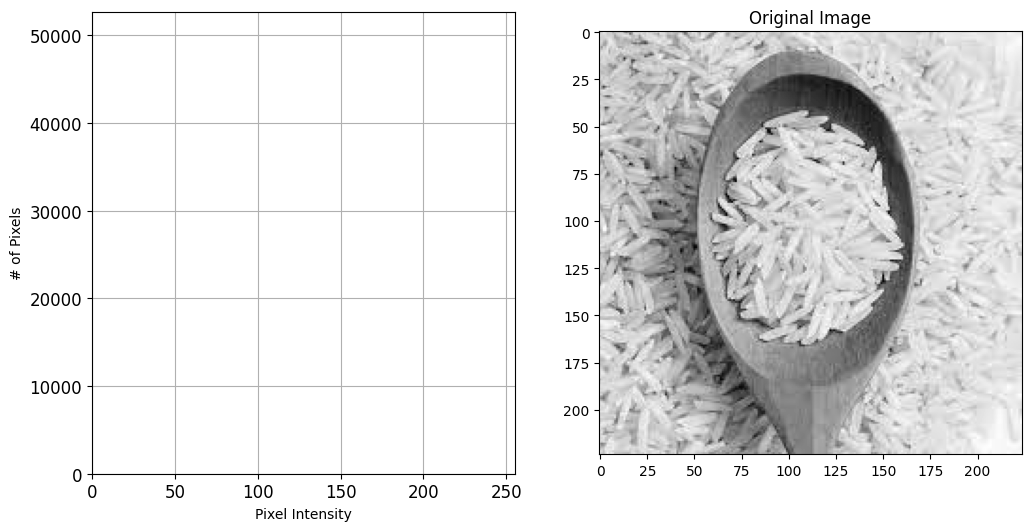

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from skimage.io import imread
from skimage.color import rgb2gray

# Load the image from Git repository
response = requests.get('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/rice.jfif')
Img = rgb2gray(imread(response.content, plugin='imageio'))

# Generate histogram
hist, bins = np.histogram(Img.flatten(), bins=256, range=[0, 256])

# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bins[:-1], hist)
plt.grid(True)
plt.xlabel('Pixel Intensity')
plt.ylabel('# of Pixels')
plt.xlim([0, 255])
plt.tick_params(axis='both', labelsize=12)

# Display the original image
plt.subplot(1, 2, 2)
plt.imshow(Img, cmap='gray')
plt.title('Original Image')

# Save the figure with histogram
plt.savefig('Histogram.png')
plt.show()

**Problem 5_5 Global Histogram Equalization**

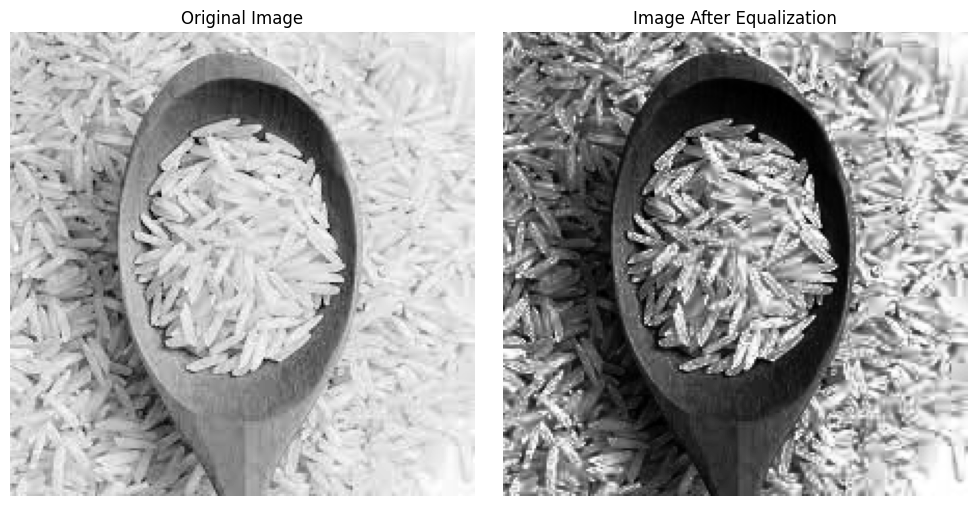

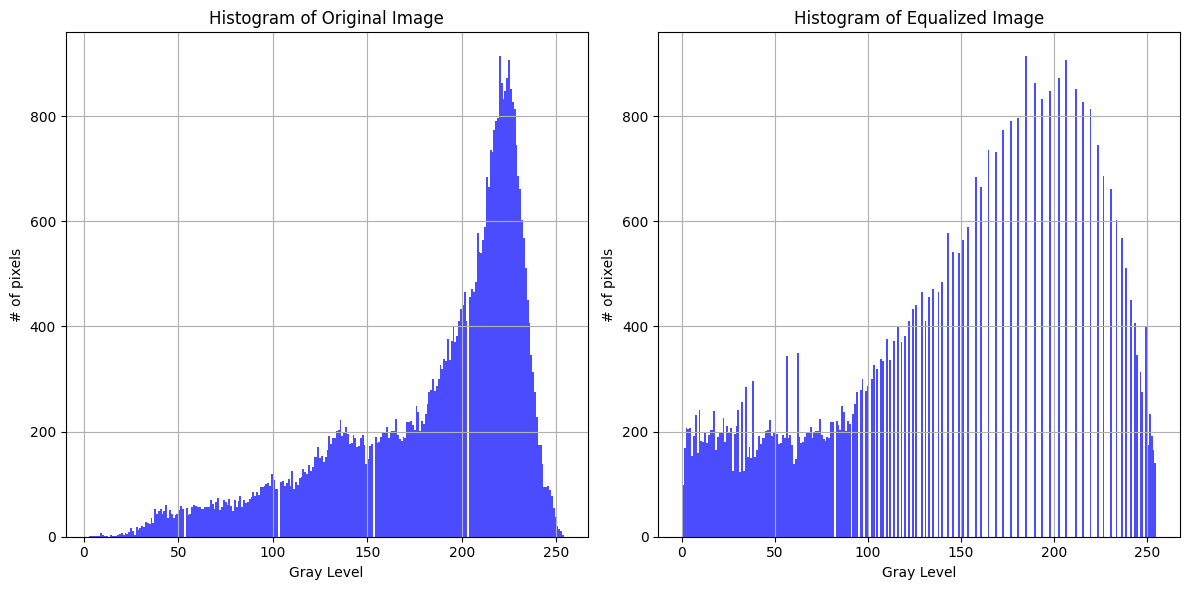

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load image from Git path
response = requests.get('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/rice.jfif')
img = cv2.cvtColor(cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR), cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
eq_img = cv2.equalizeHist(img)

# Show images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eq_img, cmap='gray')
plt.title('Image After Equalization')
plt.axis('off')

plt.tight_layout()
plt.show()

# Show histograms of two images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(img.ravel(), bins=256, color='b', alpha=0.7)
plt.grid(True)
plt.xlabel('Gray Level')
plt.ylabel('# of pixels')
plt.title('Histogram of Original Image')

plt.subplot(1, 2, 2)
plt.hist(eq_img.ravel(), bins=256, color='b', alpha=0.7)
plt.grid(True)
plt.xlabel('Gray Level')
plt.ylabel('# of pixels')
plt.title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()

**Problem 5_6 Local Histogram Equalization**

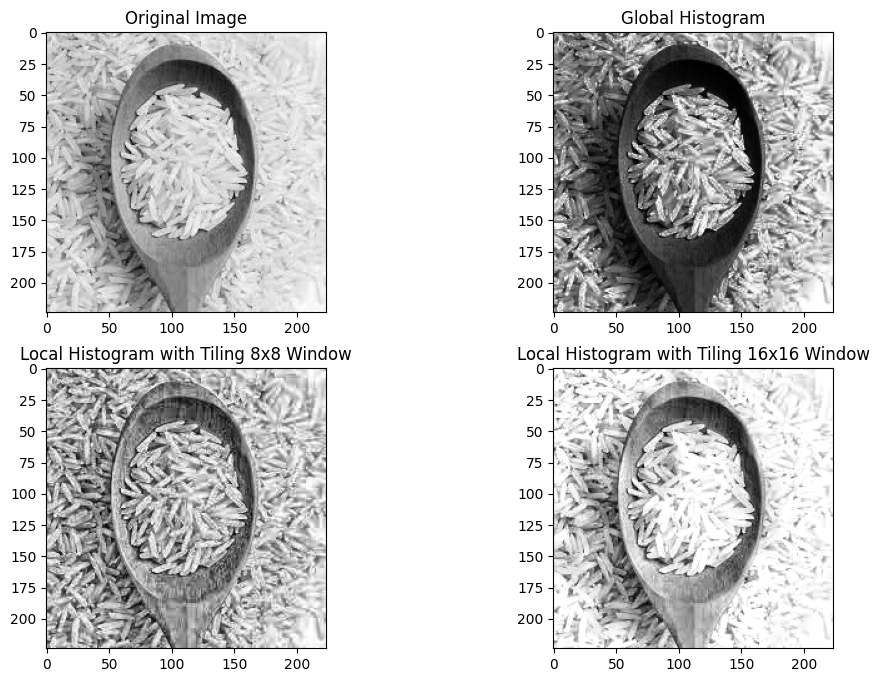

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import exposure

# Load the image from Git repository
Img = rgb2gray(imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/rice.jfif'))

# Apply global and local adaptive histogram equalization
# a. Global
eqImg = exposure.equalize_hist(Img)
# b. and c. Contrast Limited Adaptive Histogram Equalization (CLAHE) in two cases: sliding window 8x8 and 16x16
claheImg1 = exposure.equalize_adapthist(Img, kernel_size=(8, 8))
claheImg2 = exposure.equalize_adapthist(Img, kernel_size=(16, 16))

# Show images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(Img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(eqImg, cmap='gray')
plt.title('Global Histogram')

plt.subplot(2, 2, 3)
plt.imshow(claheImg1, cmap='gray')
plt.title('Local Histogram with Tiling 8x8 Window')

plt.subplot(2, 2, 4)
plt.imshow(claheImg2, cmap='gray')
plt.title('Local Histogram with Tiling 16x16 Window')

# Save images
plt.imsave('CLAHE_Global.png', eqImg, cmap='gray')
plt.imsave('CLAHE_Local_8by8.png', claheImg1, cmap='gray')
plt.imsave('CLAHE_Local_16by16.png', claheImg2, cmap='gray')

plt.show()

Thank you for watching !

# Home Work 2

Problem 7_1

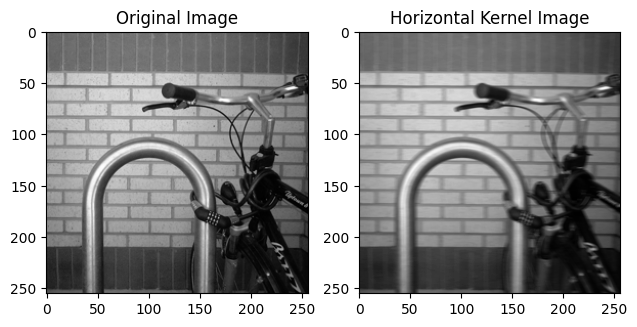

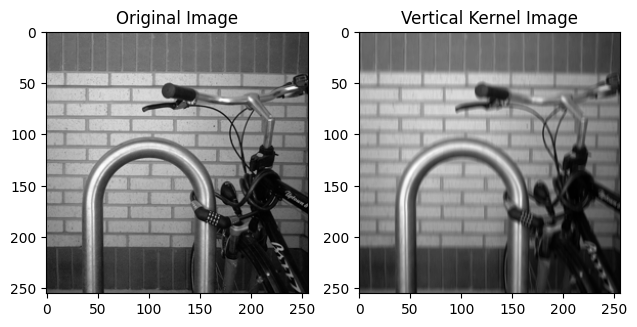

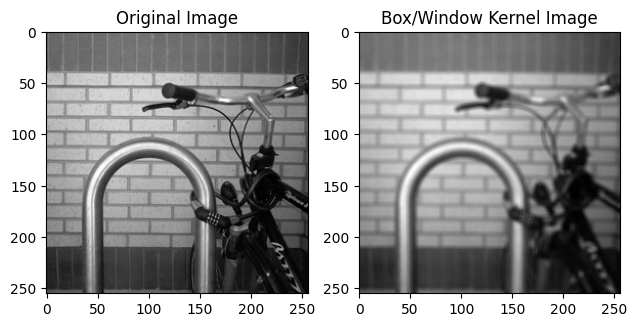

True

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

# Load image
url = "https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/bike.png"
Img = imread(url)

# Construct three different kernels (impulse responses)
k1 = np.ones((1, 5)) / 5  # horizontal kernel
k2 = np.ones((5, 1)) / 5  # vertical kernel
k3 = np.ones((5, 5)) / 25  # box/window kernel

# Perform convolution on the image
filteredImg1 = cv2.filter2D(Img, -1, k1, borderType=cv2.BORDER_REFLECT)
filteredImg2 = cv2.filter2D(Img, -1, k2, borderType=cv2.BORDER_REFLECT)
filteredImg3 = cv2.filter2D(Img, -1, k3, borderType=cv2.BORDER_REFLECT)

# Show images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(Img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(filteredImg1, cmap='gray')
axs[1].set_title('Horizontal Kernel Image')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(Img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(filteredImg2, cmap='gray')
axs[1].set_title('Vertical Kernel Image')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(Img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(filteredImg3, cmap='gray')
axs[1].set_title('Box/Window Kernel Image')
plt.tight_layout()
plt.show()

# Save images
cv2.imwrite('Horizontal_Convolution.png', filteredImg1 * 255)
cv2.imwrite('Vertical_Convolution.png', filteredImg2 * 255)
cv2.imwrite('Box_Convolution.png', filteredImg3 * 255)

Problem 7_2

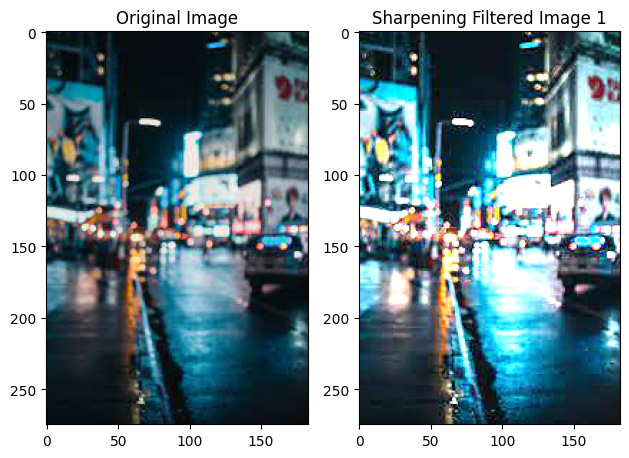

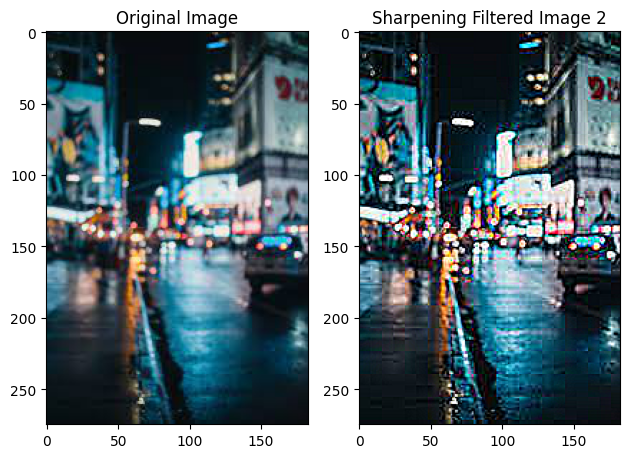

True

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

# Load image
url = "https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/street.jfif"
Img = imread(url)

# Apply a sharpening filter to the image
h1 = np.array([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]) / 3  # 3-by-3 box filter
h2 = np.array([[0, 0, -1, 0, 0],
               [0, -1, -1, -1, 0],
               [-1, -1, 16, -1, -1],
               [0, -1, -1, -1, 0],
               [0, 0, -1, 0, 0]]) / 4  # 5-by-5 box filter

filteredImg1 = cv2.filter2D(Img, -1, h1, borderType=cv2.BORDER_REPLICATE)
filteredImg2 = cv2.filter2D(Img, -1, h2, borderType=cv2.BORDER_REPLICATE)

# Show images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(Img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(filteredImg1, cmap='gray')
axs[1].set_title('Sharpening Filtered Image 1')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(Img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(filteredImg2, cmap='gray')
axs[1].set_title('Sharpening Filtered Image 2')
plt.tight_layout()
plt.show()

# Save images
cv2.imwrite('Sharpening_Filter1.png', filteredImg1 * 255)
cv2.imwrite('Sharpening_Filter2.png', filteredImg2 * 255)

Problem 7_3

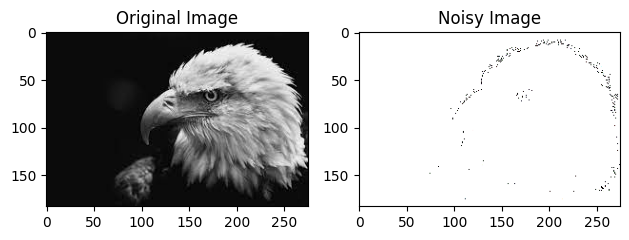

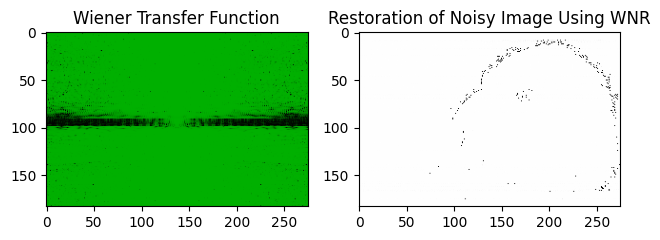

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.util import img_as_ubyte
from scipy.fft import fft2, ifft2

# Load image
url = "https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/eagle.jfif"
Img = imread(url)

# Show original image
fig, axs = plt.subplots(1, 2)
axs[0].imshow(Img, cmap='gray')
axs[0].set_title('Original Image')

# Simulate additive Gaussian noise
noise_mean = 0
noise_var = 0.005
noisyImg = np.clip(Img + np.random.normal(noise_mean, np.sqrt(noise_var), Img.shape), 0, 1)
axs[1].imshow(noisyImg, cmap='gray')
axs[1].set_title('Noisy Image')
plt.tight_layout()
plt.show()

# Save noisy image
cv2.imwrite('Additive_Gaussian_Noise.png', img_as_ubyte(noisyImg))

# Perform Wiener Filtering on the noisy image
dif = 255 * (noisyImg - Img)
rms_err_before_wnr = np.sqrt(np.mean(dif ** 2))

noisy_dft = fft2(noisyImg)  # DFT of noisy image
Img_psd = np.abs(fft2(Img)) ** 2  # original image Power Spectral Density (PSD)
noise_psd = np.prod(Img_psd.shape) * noise_var  # white noise PSD
wnr_H = Img_psd / (Img_psd + noise_psd)  # Wiener transfer function

fig, axs = plt.subplots(1, 2)
axs[0].imshow(np.fft.fftshift(np.log(1 + wnr_H)), cmap='jet', vmin=0, vmax=np.log(2 + np.max(wnr_H)))
axs[0].set_title('Wiener Transfer Function')
# axs[0].colorbar()
wnr_dft = noisy_dft * wnr_H  # DFT of filtered image
wnr = np.real(ifft2(wnr_dft))  # convert back to spatial domain
axs[1].imshow(wnr, cmap='gray')
axs[1].set_title('Restoration of Noisy Image Using WNR')
plt.tight_layout()
plt.show()

# Save filtered image
# cv2.imwrite('Wiener_Filtered_Additive_Noise.png', img_as_ubyte(wnr))

dif = 255 * (wnr - Img)
rms_err_after_wnr = np.sqrt(np.mean(dif ** 2))

Problem 7_4

RMS Error after Wiener filtering: 39.68639244296924


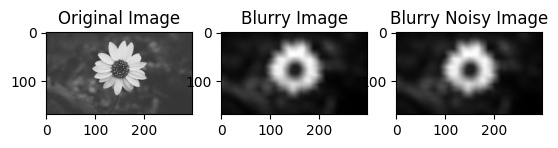

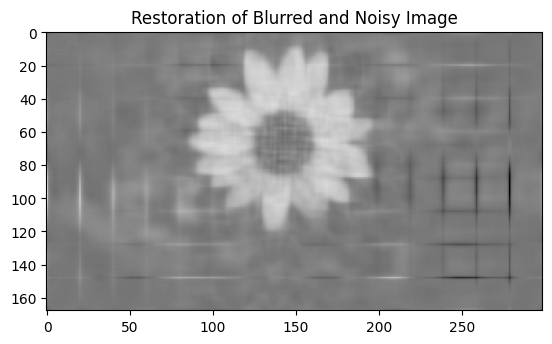

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.util import img_as_ubyte
from scipy.signal import convolve2d
from scipy.fft import fft2, ifft2
from scipy.ndimage import gaussian_filter

# Load image
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/flower.jfif')
Img = Img.astype(np.float64) / 255.0

# Show original image
plt.figure(1)
plt.subplot(1, 3, 1)
plt.imshow(Img)
plt.title('Original Image')

# Simulate a blur motion
LEN = 20
THETA = 10
PSF = gaussian_filter(np.eye(LEN), sigma=THETA)
Img_2d = np.mean(Img, axis=2)  # Convert to 2-D grayscale

# Perform convolution
blurredImg = convolve2d(Img_2d, PSF, mode='same', boundary='symm')

# Show blurry image
plt.subplot(1, 3, 2)
plt.imshow(blurredImg, cmap='gray')
plt.title('Blurry Image')

# Simulate additive noise
noise_mean = 0
noise_var = 0.01
blurred_noisyImg = blurredImg + np.random.normal(noise_mean, noise_var, size=blurredImg.shape)

# Show blurry noisy image
plt.subplot(1, 3, 3)
plt.imshow(blurred_noisyImg, cmap='gray')
plt.title('Blurry Noisy Image')

# Perform Wiener filtering
estimated_nr = noise_var / np.var(Img_2d)
PSF_pad = np.pad(PSF, ((0, blurred_noisyImg.shape[0] - PSF.shape[0]), (0, blurred_noisyImg.shape[1] - PSF.shape[1])))
PSF_fft = fft2(PSF_pad)
blurred_noisyImg_fft = fft2(blurred_noisyImg)
wnr_fft = np.conj(PSF_fft) / (np.abs(PSF_fft) ** 2 + estimated_nr)
wnr = np.real(ifft2(blurred_noisyImg_fft * wnr_fft))

# Show restored image
plt.figure(2)
plt.imshow(wnr, cmap='gray')
plt.title('Restoration of Blurred and Noisy Image')

# Save restored image
# imwrite('Wiener_Filtered_Blurry_Additive_Noise.png', img_as_ubyte(wnr))

# Calculate RMS error
dif = 255 * (wnr - Img_2d)
rms_err_after_wnr = np.sqrt(np.mean(dif**2))
print('RMS Error after Wiener filtering:', rms_err_after_wnr)

plt.show()

Problem 7_5

<ipython-input-50-feb9369e9320>:12: FutureWarning: `selem` is a deprecated argument name for `dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  BW1 = dilation(Img, selem=se1)
<ipython-input-50-feb9369e9320>:15: FutureWarning: `selem` is a deprecated argument name for `dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  BW2 = dilation(Img, selem=se2)


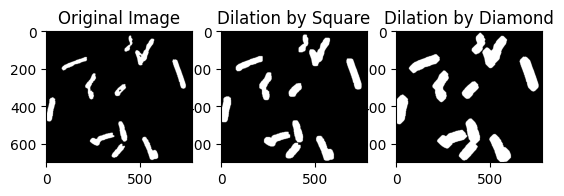

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.morphology import dilation, square, diamond

# Load image from Git path
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/traces.png')

# Perform dilation with different structuring elements (se)
# a. square with side = 15
se1 = square(10)
BW1 = dilation(Img, selem=se1)
# b. diamond with side = 15
se2 = diamond(15)
BW2 = dilation(Img, selem=se2)

# Show and save images
plt.figure(1)
plt.subplot(1, 3, 1)
plt.imshow(Img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(BW1, cmap='gray')
plt.title('Dilation by Square')

plt.subplot(1, 3, 3)
plt.imshow(BW2, cmap='gray')
plt.title('Dilation by Diamond')

imsave('Dilation_Square.png', BW1)
imsave('Dilation_Diamond.png', BW2)

plt.show()

Problem 7_6

<ipython-input-51-e3e8967cf797>:12: FutureWarning: `selem` is a deprecated argument name for `erosion`. It will be removed in version 1.0. Please use `footprint` instead.
  BW1 = erosion(Img, selem=se1)
<ipython-input-51-e3e8967cf797>:15: FutureWarning: `selem` is a deprecated argument name for `erosion`. It will be removed in version 1.0. Please use `footprint` instead.
  BW2 = erosion(Img, selem=se2)
<ipython-input-51-e3e8967cf797>:32: UserWarning: Erosion_Disk_30.png is a low contrast image
  imsave('Erosion_Disk_30.png', BW2)


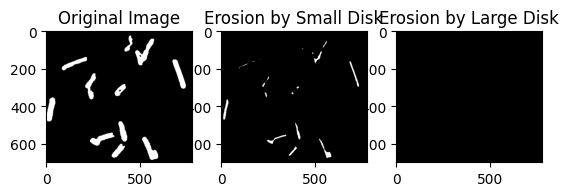

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.morphology import erosion, disk

# Load image
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/traces.png')

# Perform erosion with different structuring elements (se)
# a. small disk with radius = 10
se1 = disk(10)
BW1 = erosion(Img, selem=se1)
# b. large disk with radius = 30
se2 = disk(30)
BW2 = erosion(Img, selem=se2)

# Show and save images
plt.figure(1)
plt.subplot(1, 3, 1)
plt.imshow(Img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(BW1, cmap='gray')
plt.title('Erosion by Small Disk')

plt.subplot(1, 3, 3)
plt.imshow(BW2, cmap='gray')
plt.title('Erosion by Large Disk')

imsave('Erosion_Disk_10.png', BW1)
imsave('Erosion_Disk_30.png', BW2)

plt.show()

Problem 8_1

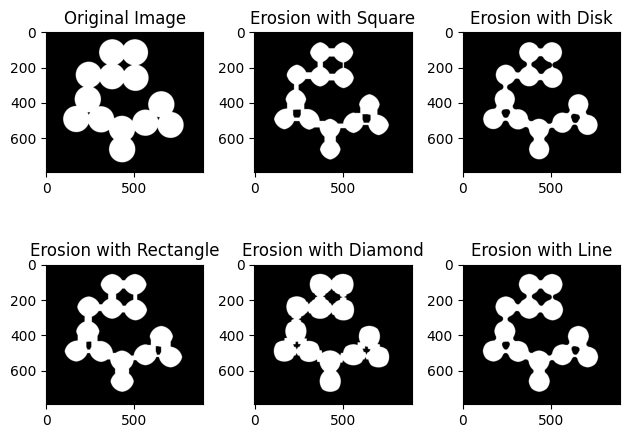

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import exposure

# Load image
import urllib.request

# URL of the image
# Load the image from Git repository
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/circles.png')

# Perform erosion with different structuring elements
# a. square with side = 30
se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 30))
BW1 = cv2.erode(Img, se1)

# b. disk with radius = 35
se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35, 35))
BW2 = cv2.erode(Img, se2)

# c. rectangle with dimensions = [15 30]
se3 = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 30))
BW3 = cv2.erode(Img, se3)

# d. diamond with radius = 30
se4 = cv2.getStructuringElement(cv2.MORPH_CROSS, (30, 30))
BW4 = cv2.erode(Img, se4)

# e. line with length = 30 and inclined degree = 45
se5 = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 30))
se5 = cv2.warpAffine(se5, cv2.getRotationMatrix2D((15, 15), 45, 1), (30, 30))
BW5 = cv2.erode(Img, se5)

# Show and save images
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(Img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(BW1, cmap='gray')
axs[0, 1].set_title('Erosion with Square')
axs[0, 2].imshow(BW2, cmap='gray')
axs[0, 2].set_title('Erosion with Disk')
axs[1, 0].imshow(BW3, cmap='gray')
axs[1, 0].set_title('Erosion with Rectangle')
axs[1, 1].imshow(BW4, cmap='gray')
axs[1, 1].set_title('Erosion with Diamond')
axs[1, 2].imshow(BW5, cmap='gray')
axs[1, 2].set_title('Erosion with Line')
plt.tight_layout()

cv2.imwrite('Binary_Erosion_Coins_Square.png', BW1)
cv2.imwrite('Binary_Erosion_Coins_Disk.png', BW2)
cv2.imwrite('Binary_Erosion_Coins_Rectangle.png', BW3)
cv2.imwrite('Binary_Erosion_Coins_Diamond.png', BW4)
cv2.imwrite('Binary_Erosion_Coins_Line.png', BW5)

plt.show()

Problem 8_2

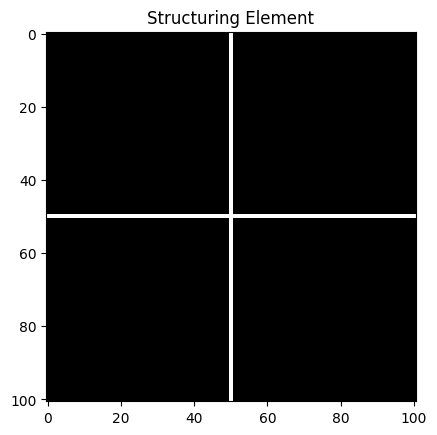

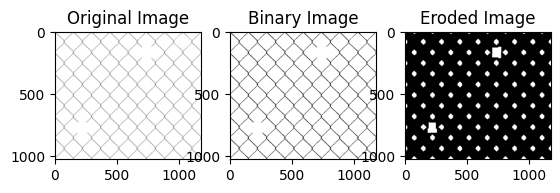

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import binary_erosion

# Load the image from Git repository
Img = rgb2gray(imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/fence.jpg'))
ImgSize = Img.shape
level = threshold_otsu(Img)
BW = Img > level

# Perform erosion with a cross structuring element
length = 101
NHOOD = np.zeros((length, length))
NHOOD[length // 2, :] = 1
NHOOD[:, length // 2] = 1
se = NHOOD.astype(bool)

# Show the structuring element
plt.figure(1)
plt.imshow(NHOOD, cmap='gray')
plt.title('Structuring Element')

BW1 = binary_erosion(BW, se)

# Display the results
plt.figure(2)
plt.subplot(1, 3, 1)
plt.imshow(Img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(BW, cmap='gray')
plt.title('Binary Image')
plt.subplot(1, 3, 3)
plt.imshow(BW1, cmap='gray')
plt.title('Eroded Image')

# Save the images
cv2.imwrite('Binary_Erosion_Fence_BW.jpg', (BW * 255).astype(np.uint8))
cv2.imwrite('Binary_Erosion_Fence_Hole_Detection.jpg', (BW1 * 255).astype(np.uint8))

plt.show()

Problem 8_3

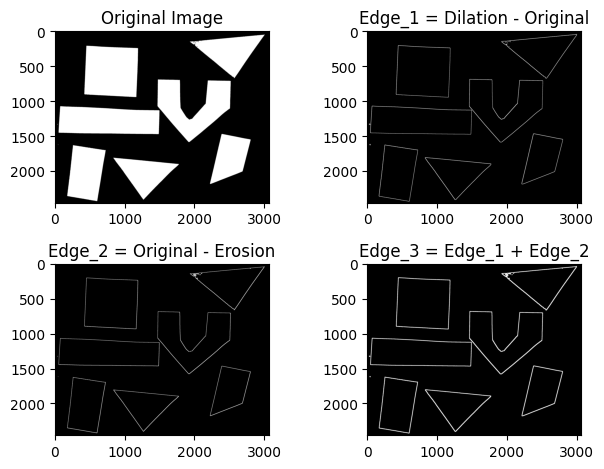

True

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.morphology import dilation, erosion, square

# Load image
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/objects.png').astype(float)

# Detect edges
se = square(10)  # Apply any structuring element
Img_dilation = dilation(Img, se)
Img_erosion = erosion(Img, se)
edge_1 = Img_dilation - Img
edge_2 = Img - Img_erosion
edge_3 = edge_1 + edge_2

# Show images
plt.subplot(2, 2, 1)
plt.imshow(Img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(edge_1, cmap='gray')
plt.title('Edge_1 = Dilation - Original')

plt.subplot(2, 2, 3)
plt.imshow(edge_2, cmap='gray')
plt.title('Edge_2 = Original - Erosion')

plt.subplot(2, 2, 4)
plt.imshow(edge_3, cmap='gray')
plt.title('Edge_3 = Edge_1 + Edge_2')

plt.tight_layout()
plt.show()

# Save images
cv2.imwrite('Edge_Detection_by_Dilation.jpg', edge_1)
cv2.imwrite('Edge_Detection_by_Erosion.jpg', edge_2)
cv2.imwrite('Edge_Detection_by_Combination.jpg', edge_3)


Problem 8_4

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import grey_dilation, grey_erosion
from skimage.io import imread

# Load image
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/portrait.jpg')

# Choose any column of the image as 1-d sample array
originalColumn = Img[:, 1800, 0]  # Extract the red channel

# Loop over different structuring elements (i.e., line)
for length in range(1, 22, 3):
    se = np.ones(length)
    dilated_Col = grey_dilation(originalColumn, structure=se)
    eroded_Col = grey_erosion(originalColumn, structure=se)

    plt.figure()
    plt.plot(originalColumn, 'b--')
    plt.plot(dilated_Col, 'r', linewidth=1)
    plt.plot(eroded_Col, 'g', linewidth=1)

    plt.title(f'Structuring Element Length = {length}')
    plt.savefig(f'1D_Dilation_Erosion_{length}.png')

    plt.close()

Problem 8_5

Number of coins: 20


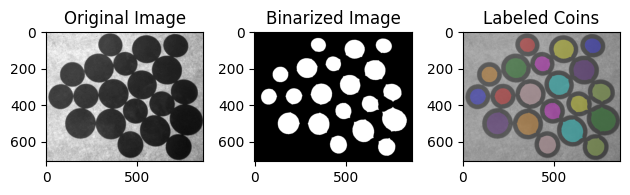

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.morphology import disk
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# Load image
Img = imread('https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/coins.png')

# Counting on processed image
fig, axs = plt.subplots(1, 3)
axs[0].imshow(Img, cmap='gray')
axs[0].set_title('Original Image')

# Binarize the original image
se = disk(25)
dilatedImg = cv2.dilate(Img, se)
level = threshold_otsu(dilatedImg)
bwImg2 = 1 - (dilatedImg >= level)
axs[1].imshow(bwImg2, cmap='gray')
axs[1].set_title('Binarized Image')

# Object counting
L, obj = label(bwImg2, connectivity=2, return_num=True)
rgbLabel2 = label2rgb(L, image=Img, bg_label=0)
print('Number of coins:', obj)
axs[2].imshow(rgbLabel2)
axs[2].set_title('Labeled Coins')

plt.tight_layout()
plt.show()